#**Stock Market Prediction**

#**Mansi Sain**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [ ]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
df = pd.read_csv(url)
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Last,float64
Close,float64
Total Trade Quantity,int64
Turnover (Lacs),float64


In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
#Taking Close prices for prediction

data = df['Close'].values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# Spliting data into training and test sets (70% train, 30% test)
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Defining a simple function to create time-steps
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step, 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 70  # You can adjust this
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape the inputs for LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
# Building the Stacked LSTM model

model = Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(time_step, 1)))  # First LSTM layer
model.add(LSTM(60, return_sequences=True))  # Second LSTM layer
model.add(LSTM(60))  # Final LSTM layer
model.add(Dense(1))  # Output layer

model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0355
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.0024
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 0.0018
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0016
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0016
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - loss: 0.0014
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0012
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0012
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0012
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 0.0010
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 0.0014
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.0014
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 9.9907e-04
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0010
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/st

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


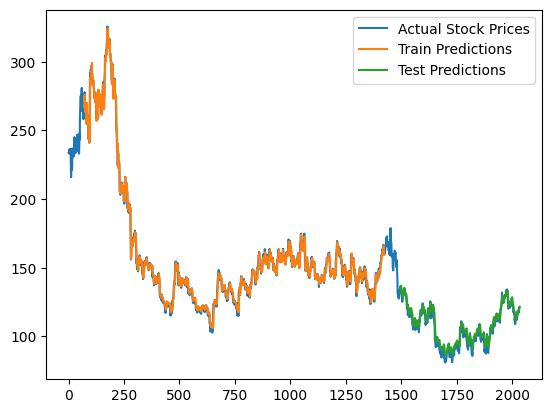

In [ ]:
# Making predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plotting the actual prices and predictions
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Stock Prices')
plt.plot(range(time_step, len(train_predict) + time_step), train_predict, label='Train Predictions')
plt.plot(range(len(scaled_data) - len(test_predict), len(scaled_data)), test_predict, label='Test Predictions')
plt.legend()
plt.show()


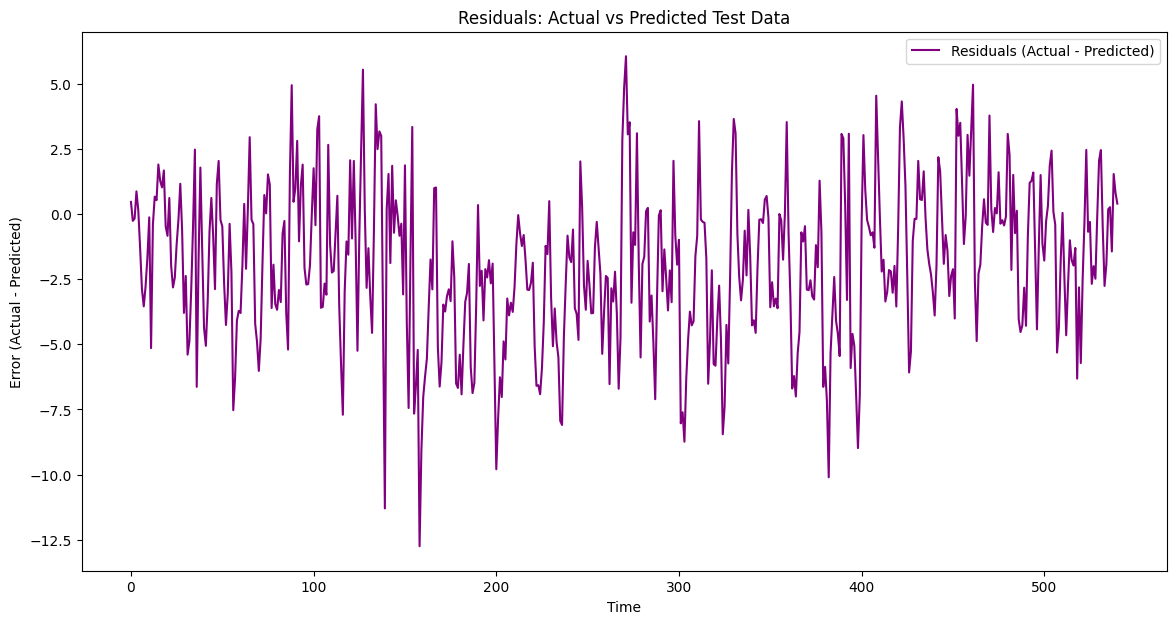

In [ ]:
# Calculate the residuals (errors)
residuals = scaler.inverse_transform(y_test.reshape(-1, 1)) - test_predict

# Plot the residuals
plt.figure(figsize=(14, 7))
plt.plot(residuals, label='Residuals (Actual - Predicted)', color='purple')

plt.title('Residuals: Actual vs Predicted Test Data')
plt.xlabel('Time')
plt.ylabel('Error (Actual - Predicted)')
plt.legend()
plt.show()
